# Setup

In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs:
np.random.seed(42)

# To plot pretty figures:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# MNIST

In ths chapter the MNIS dataset is used. It is a set of 70,000 small images of handwritten digits. Each image is labeled with the digit it represents. Scikit-Learn provides a helper function to download MINST.

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

## MNIST has the follwoing structure:
  * A DESCR `key` describing the dataset
  * A `data key` containing an array with one row per instance and one column per feature- 
  * a `target key` containing an array with the labels

In [6]:
# Let's look at these arrays:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

=> There are 70,000 images, and each has 784 features.
This is because each image is 28x28=784 pixels, and each feature represents one pixel's intensity, from 0 (white) to 255 (black)

In [8]:
y.shape

(70000,)

To look at a digit, we can grab an instance's feature vecotr, reshape it to 28x28 array, and display using [Matplotlibs's imshow() function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

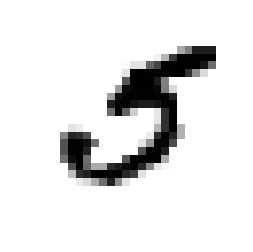

In [14]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

plt.show(plot_digit(X[36000]))

In [12]:
# Check the label:
y[36000]

5.0

## Create a test set

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000], y[:60000], y[60000]

In [17]:
# We need to shuffle the training set to ensure cross-validation folds will be similar
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [19]:
# The "5-detector", an example of a *binary classifier*, capable of distinguishing between just two classes, 5 and not-5.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Let's pick a classifier and train it. We start with a *Stochastic Gradient Descent (SGD)* classifier, using [Scikit-Learn's SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) class.

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
# Let's test of it can detect our number 5:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier i

array([0.9502 , 0.96565, 0.96495])

In [24]:
# Compare this accuracy against a very a classifier that just classifies every single image in the "not-5" class:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# Let's guess this model's accuracy:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

Since only about 10% of the images are 5s, if you always guess that an image is not a 5, you will be right about 90% of the time.

## Confusion Matrix

### First we need to make some predictions using cross_val_predict function:

In [25]:
from sklearn.model_selection import cross_val_predictvv
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/sbd/environments/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier i

### Getting the confusion matrix

<center>The general idea:</center>
<center><b>to count the number of times instances of class A are classified as class B</b></center>

Definitions:
* *actual class*: each row represents an actual class
* *predicted class*: each column represents a predicted class

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

## Precision and Recall

## Precision/Recall Tradeoff

## The ROC Curve

# Multiclass Classification

# Error Analysis

# Multilabel Classification

# Multioutput Classification